### Задание:

Выберите две особенности в данных из приведенных ниже, сформулируйте для них гипотезы по всем правилам:
* Для устройств Android наблюдаем более высокие юзерские отмены
* Если Заказ из центра, то видим более низкие юзерские отмены

Разбейте юзеров на группы с помощью рандома, например, по следующему алгориму:
* Добавьте новую колонку, где каждому юзеру присвойте значение функции RAND() - выдает случайное число от 0 до 1
* В зависимости от значения rand - поместите пользователя в группу 1 или 2. (если rand >0.5, то 1, иначе 2)

Проверьте на однородность.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

In [2]:
df = pd.read_csv('Netology_A_B-testing_HW_1.csv')

In [3]:
df.describe()

,Unnamed: 0,user_id,hour,app_opened,price_seen,order_made,ride_completed,user_cancelled,age,city_center_order,distance
count,101500.000000,101500.000000,101500.000000,101500.0,101500.000000,101500.000000,101500.000000,101500.000000,101500.000000,101500.000000,91431.000000
mean,50749.500000,549874.802207,11.481429,1.0,0.900798,0.731389,0.620365,0.111025,40.471764,0.571675,5.371152
std,29300.670499,258600.104176,6.917522,0.0,0.298934,0.443239,0.485299,0.314164,13.536322,0.494838,4.118531
min,0.000000,100093.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.010946
25%,25374.750000,328223.000000,5.000000,1.0,1.000000,0.000000,0.000000,0.000000,29.000000,0.000000,2.438335
50%,50749.500000,548827.000000,11.000000,1.0,1.000000,1.000000,1.000000,0.000000,40.000000,1.000000,4.279565
75%,76124.250000,773051.000000,17.000000,1.0,1.000000,1.000000,1.000000,0.000000,52.000000,1.000000,7.129814
max,101499.000000,999978.000000,23.000000,1.0,1.000000,1.000000,1.000000,1.000000,69.000000,1.000000,40.268966


In [4]:
df.head(10)

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
0,0,2020-05-21,867689,12,1,1,1,no surge,1,0,20,iOS,0,business,7.982135,low
1,1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
3,3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium
5,5,2020-05-21,139455,5,1,0,0,NaN,0,0,60,Android,1,comfort,NaN,low
6,6,2020-05-24,416988,0,1,1,0,no surge,0,0,65,iOS,1,comfort,7.535725,low
7,7,2020-05-22,682337,2,1,1,1,no surge,1,0,40,Android,1,comfort,9.055344,medium
8,8,2020-05-23,931492,20,1,0,0,NaN,0,0,25,iOS,0,economy,NaN,medium
9,9,2020-05-23,662775,17,1,1,1,surge,1,0,48,Android,1,comfort,4.828326,medium


Выбираем особенность - **Для устройств Android наблюдаем более высокие юзерские отмены**

In [5]:
df_cancelled = df[df['user_cancelled']==1]

In [6]:
df_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11269 entries, 22 to 101493
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11269 non-null  int64  
 1   date               11269 non-null  object 
 2   user_id            11269 non-null  int64  
 3   hour               11269 non-null  int64  
 4   app_opened         11269 non-null  int64  
 5   price_seen         11269 non-null  int64  
 6   order_made         11269 non-null  int64  
 7   surge              11269 non-null  object 
 8   ride_completed     11269 non-null  int64  
 9   user_cancelled     11269 non-null  int64  
 10  age                11269 non-null  int64  
 11  os                 11269 non-null  object 
 12  city_center_order  11269 non-null  int64  
 13  order_class        11269 non-null  object 
 14  distance           11269 non-null  float64
 15  rfm                11269 non-null  object 
dtypes: float64(1), int64

Гипотеза: **если мы снизим стоимость поездки на 5% для пользователей Android в выходные дни, то количество отмен сократится на 3%, потому что цена станет более привлекательной.**

In [7]:
df_os = pd.pivot_table(df_cancelled, index="os", values="user_id", aggfunc='nunique')
df_os

,user_id
os,
Android,6345
iOS,3601


([<matplotlib.patches.Wedge at 0x1ba7157eeb0>,
 [Text(-0.4619214267977417, 0.9983128745364045, 'Android'),
  Text(0.46192133332894214, -0.9983129177846055, 'iOS')],
 [Text(-0.2519571418896772, 0.5445342952016751, '63.79'),
  Text(0.25195709090669566, -0.544534318791603, '36.21')])

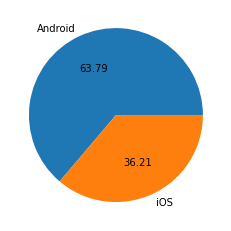

In [8]:
plt.pie(df_os.user_id, labels=["Android", "iOS"], autopct="%.2f")

**Разбивка пользователей на группы для 1го теста**

In [9]:
df_android = df[df['os'] == 'Android']
df_android

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
1,1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
3,3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium
5,5,2020-05-21,139455,5,1,0,0,NaN,0,0,60,Android,1,comfort,NaN,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101489,101489,2020-05-20,969159,22,1,0,0,NaN,0,0,67,Android,0,comfort,NaN,medium
101490,101490,2020-05-20,780673,20,1,1,0,surge,0,0,67,Android,1,comfort,5.439498,medium
101491,101491,2020-05-21,456333,10,1,1,1,no surge,1,0,34,Android,1,business,16.003392,high
101495,101495,2020-05-24,288445,16,1,1,1,no surge,1,0,29,Android,0,comfort,1.725907,high


In [10]:
df_android_cancel = pd.pivot_table(df_android, index='user_id', values='user_cancelled', aggfunc='mean')
df_android_cancel

,user_cancelled
user_id,
100093,0.000000
100118,0.500000
100134,0.250000
100166,0.250000
100255,0.250000
...,...
999870,0.500000
999878,0.333333
999945,0.000000


In [11]:
df_android_cancel['rand'] = 0.0

for i in range(len(df_android_cancel)):
    t = random.random()
    df_android_cancel['rand'].values[i] = t

df_android_cancel['group'] = df_android_cancel['rand'].apply(lambda x: '1' if x<0.5 else '2')
df_android_cancel

,user_cancelled,rand,group
user_id,,,
100093,0.000000,0.925815,2
100118,0.500000,0.928886,2
100134,0.250000,0.864864,2
100166,0.250000,0.546697,2
100255,0.250000,0.911154,2
...,...,...,...
999870,0.500000,0.775410,2
999878,0.333333,0.085504,1
999945,0.000000,0.090418,1


In [12]:
len(df_android_cancel[df_android_cancel['group']=='1']), len(df_android_cancel[df_android_cancel['group']=='2'])

(11075, 11079)

In [22]:
group_1 = df_android_cancel[df_android_cancel['group']=='1'].sample(11000)
group_2 = df_android_cancel[df_android_cancel['group']=='2'].sample(11000)

In [23]:
len(group_1), len(group_2)

(11000, 11000)

**Проверка групп на однородность**

    Н0: группы 1 и 2 однородны
    Н1: группы 1 и 2 не однородны

In [24]:
stat, p = stats.mannwhitneyu(group_1['user_cancelled'], group_2['user_cancelled'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Однородны')
else:
	print('Не однородны')

Statistics=60268752.000, p=0.538
Однородны


**Таким образом не отклоняем H0**

Выбираем 2 особенность - **Если Заказ из центра, то видим более низкие юзерские отмены**

Гипотеза: **eсли мы увеличим стоимость поездки на 5%, для заказов из центра города в будни, то наша выручка увеличится на 3%, потому что выручка с одного заказа увеличится и количество отмен  при этом не возрастёт.**

In [16]:
df_centre = pd.pivot_table(df, index='city_center_order', columns='user_cancelled',values='user_id', aggfunc='count')
df_centre

user_cancelled,0,1
city_center_order,,
0,37843,5632
1,52388,5637


<AxesSubplot:xlabel='city_center_order'>

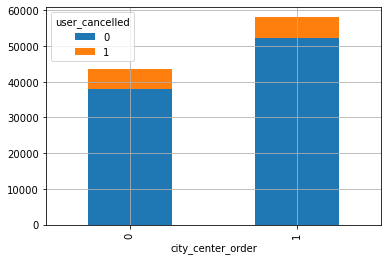

In [17]:
df_centre.plot(kind = 'bar', stacked = True, grid = True)

In [18]:
df_users_cancel = pd.pivot_table(df, index='user_id', values='user_cancelled', aggfunc='mean')
df_users_cancel

,user_cancelled
user_id,
100093,0.000000
100118,0.200000
100134,0.200000
100166,0.200000
100255,0.111111
...,...
999870,0.500000
999878,0.142857
999945,0.000000


In [19]:
df_users_cancel['rand'] = 0.0

for i in range(len(df_users_cancel)):
    t = random.random()
    df_users_cancel['rand'].values[i] = t
    
df_users_cancel['group'] = df_users_cancel['rand'].apply(lambda x: '1' if x<0.5 else '2')
df_users_cancel

,user_cancelled,rand,group
user_id,,,
100093,0.000000,0.343919,1
100118,0.200000,0.132839,1
100134,0.200000,0.905658,2
100166,0.200000,0.086092,1
100255,0.111111,0.943798,2
...,...,...,...
999870,0.500000,0.166302,1
999878,0.142857,0.880257,2
999945,0.000000,0.059343,1


In [20]:
len(df_users_cancel[df_users_cancel['group']=='1']), len(df_users_cancel[df_users_cancel['group']=='2'])

(12263, 11961)

In [25]:
group_3 = df_users_cancel[df_users_cancel['group']=='1'].sample(11900)
group_4 = df_users_cancel[df_users_cancel['group']=='2'].sample(11900)

In [26]:
len(group_3), len(group_4)

(11900, 11900)

**Проверка групп на однородность**

    Н0: группы 1 и 2 однородны
    Н1: группы 1 и 2 не однородны

In [27]:
stat, p = stats.mannwhitneyu(group_3['user_cancelled'], group_4['user_cancelled'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Однородны')
else:
	print('Не однородны')

Statistics=70456852.500, p=0.449
Однородны


**Таким образом не отклоняем H0**